# Práctica 2
---
### Ejercicio 1

Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son:

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$
$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$
$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$


##### Graficar la función y los polinomios constante, lineal y cuadrático en una sola gráfica con matplotlib en el intervalo [1,2]. 


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def base_function(x):
    return 1/x

#ponemos un argumento aunque no lo usemos para poder utilizar la función map() más adelante
def taylor_polynomial_0(x_0):
    return 2/3

def taylor_polynomial_1(x_0, x):
    return taylor_polynomial_0(x_0) - ((1/(x_0**2))*(x - x_0))

def taylor_polynomial_2(x_0, x):
    return taylor_polynomial_1(x_0,x) + ((2/(x_0**3))*((x-x_0)**2))

x = 1.9
x0 = 1.5

x_values = np.linspace(1,2,100)    #rango de 1 a 2 con 100 números (el intervalo es [1,2] en este ejercicio)

#obtener valores de eje verticial con la funciñon f(x)
y_values_base_function = list(map(base_function, x_values))

#obtener valores del eje vertical con la función P0(x)
y_values_tay_pol_0 = list(map(taylor_polynomial_0, x_values))

#obtener valores del eje vertical con la función P1(x)
y_values_tay_pol_1 = list(map(taylor_polynomial_1, [1.5]*100, x_values))

#obtener valores del eje vertical con la función P2(x)
y_values_tay_pol_2 = list(map(taylor_polynomial_2, [1.5]*100, x_values))


plt.plot(
    x_values, y_values_base_function,
    x_values, y_values_tay_pol_0,
    x_values, y_values_tay_pol_1,
    x_values, y_values_tay_pol_2
)
plt.grid(True) 
plt.show()


<Figure size 640x480 with 1 Axes>

##### ¿Cuánto es la aproximación de los polinomios en x=1.9? Calcula el error relativo de tus aproximaciones.
$$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$

In [3]:
x_0 = 1.5
x = 1.9

aprox_0 = taylor_polynomial_0(x_0)
aprox_1 = taylor_polynomial_1(x_0, x)
aprox_2 = taylor_polynomial_2(x_0, x)

print("P0(x) =", aprox_0)
print("P1(x) =", aprox_1)
print("P2(x) =", aprox_2)

P0(x) = 0.6666666666666666
P1(x) = 0.48888888888888893
P2(x) = 0.5837037037037037


### Ejercicio 2

#### Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de 

$f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ 

#### y diferencias hacia delante. Valor a aproximar: 

$f^{(2)}(1) = e^{-1}$. Usar:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def error_relativo(p, p_ast):
    return np.abs(p - p_ast)/np.abs(p_ast)

def aprox_derivada(f,x,h):
    return (f(x+h) - f(x-h))/(2.0*h)

def aprox_2a_derivada(f,x,h):
    return (f(x+h) - 2.0*f(x) + f(x-h))/h**2

f = lambda x: np.exp(-x)

x=1
aux = np.arange(-16, 0, 1)
h = np.power(10.0, aux)

In [5]:
objetivo_df = -math.exp(-x)
objetivo_dff = math.exp(-x)

In [6]:
df = aprox_derivada(f, x, h)
dff = aprox_2a_derivada(f, x, h)

err_df = error_relativo(df, objetivo_df)
err_dff = error_relativo(dff, objetivo_dff)

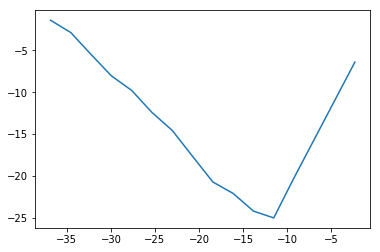

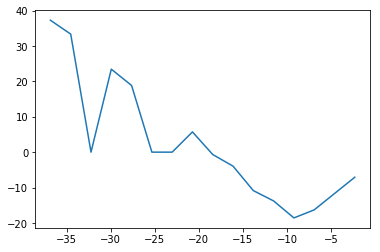

In [7]:
plt.plot(np.log(h), np.log(err_df))
plt.show()
plt.plot(np.log(h), np.log(err_dff))
plt.show()

---
### Ejercicio 3
#### Newton-Cotes
#### Regla del rectángulo, trapecio y Simpson
Aproximar el valor de la integral $\int_0^{\pi}sin(x)dx = 2$ con reglas compuestas del rectángulo y trapecio con un número de subintervalos $n \in \{1,10,20,30,40 \}$ y hacer gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal).

---

### Regla del rectángulo
Le regla del rectángulo se define:
El área total aproximada debajo de  $f(x)$ en el interavalo `[a,b]`, es igual a la sumatoria de las áreas $I_i$, de $n$ rectángulos espaciados en $h=\frac{b-a}{n}$, 
Entonces: 
$$
I=\sum_{i=1}^{n}I_{i}
$$
En donde
$$
I_i = h*f(x_i)
$$
con $ i = 1, 2, ..., n$ y $x_0=a y x_n = b$

In [8]:
def calculate_h(a,b,n):
    return float((b - a)/n)

def rectangle_rule_approximation(fn, a, b, n): 
    #fn=función a ser estimada, a,b -> intervalos [a,b], n -> cantidad de intervalos
    #Está medio ineficiente este algoritmo. Hay que encontrar la forma de quitar los ciclos
    h = calculate_h(a,b,n)
    area = 0
    for i in range(0,n):
        area += fn(h*i) * h
    return area

def relative_error(area, area_ast):
    return np.abs(area - area_ast)/np.abs(area_ast)

#vamos a probar este código con n=1, 10, 20 y 30
print("Pruebas con sin(x) entre 0 y pi con n=1,10,20,30")
print("n=1  -> Area=", rectangle_rule_approximation(math.sin, 0, math.pi, 1))
print("n=10 -> Area=", rectangle_rule_approximation(math.sin, 0, math.pi, 10))
print("n=20 -> Area=", rectangle_rule_approximation(math.sin, 0, math.pi, 20))
print("n=30 -> Area=", rectangle_rule_approximation(math.sin, 0, math.pi, 30))

Pruebas de la integral de sin(x) entre 0 y pi con n=1,10,20,30
n=1  -> Area= 0.0
n=10 -> Area= 1.9835235375094544
n=20 -> Area= 1.9958859727087146
n=30 -> Area= 1.9981719613436544


Claramente podemos ver que tiende a acercarse a $2$ conforme crece $n$... Entonces nuestro còdigo está bien

In [9]:
#Exercise solution
fn = math.sin
a = 0
b = math.pi
n_list = np.array([1,10,20,30,40])
rectangle_rule_aproximations = []
for n in n_list:
    rectangle_rule_aproximations.append(rectangle_rule_approximation(fn, a, b, n))

In [10]:
print("Aproximaciones:", rectangle_rule_aproximations)

Aproximaciones: [0.0, 1.9835235375094544, 1.9958859727087146, 1.9981719613436544, 1.998971810497066]


In [11]:
objetivo = 2
relative_errors = list(map(relative_error, rectangle_rule_aproximations, [2]*5))

In [12]:
relative_errors

[1.0,
 0.008238231245272787,
 0.0020570136456427024,
 0.0009140193281728104,
 0.0005140947514670202]

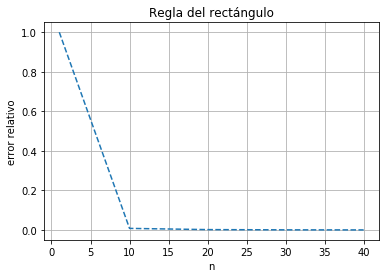

In [13]:
plt.plot(list(n_list), relative_errors, '--')
plt.title("Regla del rectángulo")
plt.xlabel('n')
plt.ylabel('error relativo')
plt.grid(True)
plt.show()

### Regla del trapecio
Le regla del trapecio se define:
El área total aproximada debajo de  $f(x)$ en el interavalo `[a,b]`, es igual a la sumatoria de las áreas $I_i$, de $n$ rectángulos espaciados en $h=\frac{b-a}{n}$, 
Entonces: 
$$
I=\sum_{i=0}^{n-1}I_{i}
$$
En donde
$$
I_{i}=\frac{h}{2}\left[f\left(x_{i}\right)+f\left(x_{i+1}\right)\right]
$$
con $ i = 0, 1, ..., n$ y $x_0=a y x_n = b$

In [35]:
def trapezoide_rule_approximation(fn, a, b, n):
    h = calculate_h(a, b, n)
    area = 0
    for i in range(0,n):
        area += (h/2)*(fn(h*i) + fn(h*(i+1)))
    return area


In [39]:
print("Pruebas con sin(x) entre 0 y pi con n=1,10,20,30")
print("n=1  -> Area=", trapezoide_rule_approximation(math.sin, 0, math.pi, 1))
print("n=10 -> Area=", trapezoide_rule_approximation(math.sin, 0, math.pi, 10))
print("n=20 -> Area=", trapezoide_rule_approximation(math.sin, 0, math.pi, 20))
print("n=30 -> Area=", trapezoide_rule_approximation(math.sin, 0, math.pi, 30))

Pruebas con sin(x) entre 0 y pi con n=1,10,20,30
n=1  -> Area= 1.9236706937217898e-16
n=10 -> Area= 1.9835235375094546
n=20 -> Area= 1.9958859727087146
n=30 -> Area= 1.9981719613436542


In [52]:
#Exercise solution
fn = math.sin
a = 0
b = math.pi
n_list = np.array([1,10,20,30,40])
trapezoide_rule_aproximations = []
for n in n_list:
    trapezoide_rule_aproximations.append(trapezoide_rule_approximation(fn, a, b, n))

In [53]:
print("Aproximaciones:", trapezoide_rule_aproximations)

Aproximaciones: [1.9236706937217898e-16, 1.9835235375094546, 1.9958859727087146, 1.9981719613436542, 1.9989718104970657]


In [59]:
relative_errors = list(map(relative_error, trapezoide_rule_aproximations, [2]*5))
relative_errors

[0.9999999999999999,
 0.008238231245272676,
 0.0020570136456427024,
 0.0009140193281729214,
 0.0005140947514671312]

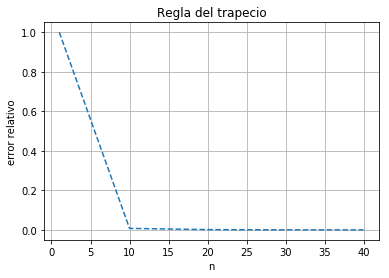

In [58]:
plt.plot(list(n_list), relative_errors, '--')
plt.title("Regla del trapecio")
plt.xlabel('n')
plt.ylabel('error relativo')
plt.grid(True)
plt.show()